# Applied Linear Algebra - Lab 3
Ferdowsi University of Mashhad - Computer Engineering Department

Fall 2023

### Table of Contents

* [Projection matrices and least squares](#sec1)
    * [Exercise 1](#sec2)
* [QR Decomposition](#sec3)
    * [Exercise 2](#sec4)
* [Predicting Mobile prices](#sec5)
    * [Exercise 3](#sec6)
    * [Exercise 4](#sec7)
* [Polynomial Regression](#sec8)
    * [Exercise 5](#sec9)
* [Predicting Mobile prices using Polynomial Regression](#sec10)
    * [Exercise 6](#sec11)
* [Recursive least squares](#sec12)
    * [Exercise 7](#sec9)
* [Predicting House price using Recursive least squares](#sec10)
    * [Exercise 8](#sec11)


* [Optional Excersice](#sec12)

# Projection matrices and least squares <a class="anchor" id="sec1"></a>

### Least square approximation
A crucial application of least squares is fitting a straight line to $m$ points.

Consider five points in the plane: 

$$ (x_i, y_{i}) = (1, 3), (3, 5), (4, 10) , (6, 12), (7, 14) $$

- Find the closest line to these five points.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

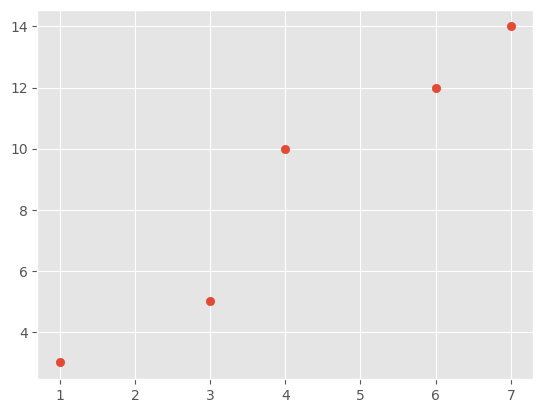

In [88]:
x = np.array([[1], [3], [4], [6], [7]]) 
y = np.array([[3], [5], [10], [12], [14]]) 
plt.scatter(x, y)
plt.show()

- No straight line $ y = \theta_0 + \theta_1 x  $ goes through these five points. 
- We are looking for numbers $\theta_0$ and $\theta_1$  that satisfy five equations:
     
$$ (x_1 = 1) \;\;\;\; y_1 = \theta_0 + 1\theta_1 = 3 $$
     
$$ (x_2 = 3) \;\;\;\; y_2 = \theta_0 + 2\theta_1 = 5 $$
     
$$ (x_3 = 4) \;\;\;\; y_3 = \theta_0 + 4\theta_1 = 10 $$

$$ (x_4 = 6) \;\;\;\; y_4 = \theta_0 + 5\theta_1 = 12 $$

$$ (x_5 = 7) \;\;\;\; y_5 = \theta_0 + 7\theta_1 = 14 $$
    
    
- This 5 by 2 system has no solution, $ y = (3, 5, 10, 12, 14) $ is not a combination of the columns of $X$.

$$X = \begin {bmatrix} 1 & 1 \\ 1 & 3 \\ 1 & 4\\ 1 & 6 \\ 1 & 7  \end{bmatrix} \;\;\;\; \theta = \begin {bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} \;\;\;\; y = \begin {bmatrix} 3 \\ 5 \\ 10\\ 12 \\14 \end{bmatrix} \;\;\;\; X \theta = y \;\; \text{is not solvable} $$



#### Minimizing the Error

- Now that we cannot fit a line that goes through all five points, we try to find the best line $(\hat{\theta})$ for the five points and minimize the overall error, the error is 
    $ | e |^2 = | y - X\hat{\theta} |^2 $
    
- In order to minimize the error, we look for the closest point to $y$ that is in the column space of $X$, the nearest point is $p$ (the projection of $b$ into $A$.)

- Every vector $b$ splits into two parts, The part in the column space is $p$. and The perpendicular part is $e. \; (y = p + e) $

- We can find $\hat{\theta}$ (best fitting line) by solving the equation $ X^T X  \hat{\theta} = X^T y$

$$ \hat{\theta} = \begin {bmatrix} \hat{\theta_0} \\ \hat{\theta_1} \end{bmatrix} \;\;\;\;\;\;\; \hat{\theta} =  (X^T X)^{-1} X^T y $$ 


## Exercise 1 <a class="anchor" id="sec2"></a>


In [89]:
X = np.array([[1, 1], [1, 3], [1, 4], [1, 6], [1, 7]]) 
y = np.array([[3], [5], [10], [12], [14]]) 

**Question 1:** calculate $\hat{\theta}$ for the given data points.

In [90]:
from numpy.linalg import inv

# Calculate the best fitting line (hat theta)
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta_hat)

[[0.84210526]
 [1.89473684]]


so the best line that minimizes the overall error is 

$$h(x_i) = \hat{\theta_0} + \hat{\theta_1} \times x_i = 0.842 + 1.894 \times x_i \;\;\;\;\;\text{(this is the hypothesis function)} \;\; \text{and} \;\;  h = X \hat{\theta} $$

**Question 2:** calculate $h$ (matrix of predicted $y$):

In [91]:
h = X @ theta_hat
print(h)
#h[0], h[1], h[2], h[3] and h[4] are predicted points for y0, y1, y2, y3 and y4 

[[ 2.73684211]
 [ 6.52631579]
 [ 8.42105263]
 [12.21052632]
 [14.10526316]]


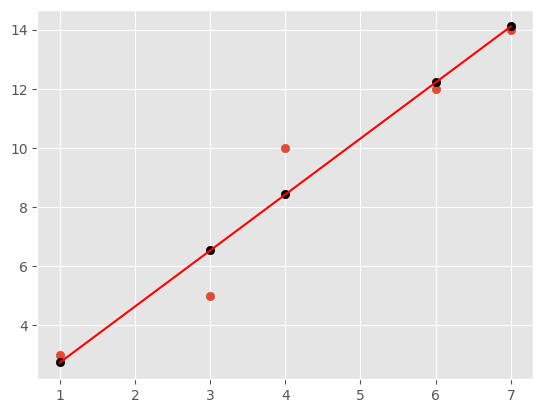

In [92]:
plt.scatter(x, y)
plt.scatter(x, h, color = 'black')
plt.plot(x, h, color = 'red')
plt.show()
#red line is the best line for that five points

A problem with this approach is the matrix inverse that is both computationally expensive and numerically unstable. An alternative approach is to use a matrix decomposition to avoid this operation. We will look at QR decomposition in the following section.

# QR Decomposition <a class="anchor" id="sec3"></a>

- The QR decomposition (also called the QR factorization) of a matrix is a decomposition of the matrix into an orthogonal matrix and a triangular matrix. 
$$ A = QR $$
where $Q$ is an orthogonal matrix ($Q^T Q = I$) and $R$ is an upper triangular matrix. 
- $Q$ is a $m*n$ matrix and $R$ is an upper triangle matrix with the size $n * n$

An Orthogonal Matrix $Q$ with orthonormal columns satisfies $ Q^T Q = I$ :

$$Q^T Q = \begin {bmatrix}  & q_1^T & \\  & q_2^T  & \\ & q_3^T & \end{bmatrix} \begin {bmatrix}  &  & \\ q_1 & q_2 & q_3 \\ & & \end{bmatrix} = 
\begin {bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} = I $$ 
There are several methods for computing the QR decomposition. One of such method is the Gram-Schmidt process.

### The Gram-Schmidt Process 

Start with the independent columns of $A$: $a_1, a_2, ..., a_n$. We want to construct orthogonal vectors $u_1, u_2, ..., u_n$. Then we divide $u_1, u_2, ..., u_n$ by their lengths.

That produces orthonormal vectors $q_1 = \frac{u_1}{||u_1||}, q_2 = \frac{u_2}{||u_2||}, ..., q_n = \frac{u_n}{||u_n||} $

Begin by choosing $u_1 = a_1$. This first direction is accepted as it comes.
The next direction $u_2$ must be perpendicular to $u_1$. Start with $a_2$ and subtract its projection along $u_1$. This leaves the perpendicular part, which is the orthogonal vector $u_2$:

$$
\text{proj}_{v} (u) = \text{projection of $u$ onto $v$} = \frac{v^T . u}{v^T . v} . v 
$$

When vector $u$ is projected onto a vector $v$, its projection $w$ is the part of $u$ along that vector $v$.

<img src="projection_line.png" width="400" height="200">


$$
\text{First Gram-Schmidt step} \;\;\;\;\;\;\;\; u_2 = a_2 - proj_{u_1} (a_2)
$$

so now $u_1$ and $u_2$ are orthogonal.
The third direction starts with $a_3$. This is not a combination of $u_1$ and $u_2$ (because $a_3$ is not a combination of $a_1$ and $a_2$). But most likely $a_3$ is not perpendicular to $u_1$ and $u_2$. So subtract off its components in those two directions to get a perpendicular direction $u_3$:

$$
\text{Next Gram-Schmidt step} \;\;\;\;\;\;\;\; u_3 = a_3 - proj_{u_1} (a_3) - proj_{u_2} (a_3).
$$

This is the idea of the Gram-Schmidt process. Subtract from every new
vector its projections in the directions already set. That idea is repeated at every step.
For the fourth vector $a_4$, we would subtract three projections onto $u_1, u_2, u_3$ to get $u_4$.

$$u_x = a_x - \sum_{i=1}^{x-1} proj_{u_i} (a_x) \;\;\;\;\; \text{ for x = 1, ..., n}$$

At the end, or immediately when each one is found, divide the orthogonal vectors $u_1, u_2, ..., u_n$ by their lengths. The resulting vectors $q_1, q_2, ..., q_n$ are orthonormal.

$$q_x = \frac{u_x}{||u_x||} \;\;\;\;\; \text{ for x = 1, ..., n}$$


$$Q = \begin {bmatrix} q_1 \;|\; q_2 \;|\; ... \;|\; q_n\end{bmatrix} \;\;\; \text{q's are columns of Q}$$

We started with a matrix $A$ and ended up with a matrix $Q$. How are those matrices related? matrix $R$ connects them, $A = QR$

For a $3$by $3$ matrix A: 
$$ A = \begin {bmatrix}  &  & \\ a_1 & a_2  & a_3 \\ & & \end{bmatrix} 
= QR
= \begin {bmatrix}  &  & \\ q_1 & q_2 & q_3 \\ & & \end{bmatrix} 
\begin {bmatrix} q_1^T a_1 & q_1^T a_2 & q_1^T a_3\\  & q_2^T a_2 & q_2^T a_3 \\ & & q_3^T a_3 \end{bmatrix} $$

## Implementing Gram-Schmidt process 
## Exercise 2 <a class="anchor" id="sec4"></a>
**Question 1:** implement function `proj` which takes 2 vectors $v$ and $u$ and returns projection of v onto u.


In [93]:
def proj(v, u):
    result = ((u.T@v)/(u.T@u))*u # SOLUTION  
    return result 

**Question 2:** implement the function `qr_gram_schmidt` which takes the matrix $A$ and returns the $Q$ and $R$ using gram schmidt process.

In [94]:
def qr_gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    
    for i in range(n):
        u = A[:,i] # SOLUTION 
        for j in range(i):
            u = u - proj(A[:, i], Q[:, j]) # SOLUTION 
        
        Q[:, i] = u / np.sqrt(u.T @ u) # SOLUTION 
    
    
    # Q.T @ Q = I ---> left inverse of Q = Q.T
    # A = QR
    # R = ? 
    
    R = Q.T @ A # SOLUTION 
    
    return Q, R
    


## Numerical Stability of Gram-schmidt:
When this process is implemented on a computer, the vectors $u_k$ are often not quite orthogonal, due to rounding errors. For the Gram-Schmidt process as described above (sometimes referred to as "classiscal gram-schmidt") this loss of orthogonality is particulary bad; therefore, it is said that the (Classical) Gram-schmidt process is numerically unstable.

The gram-schmidt process can be stabilized by a small modification; this version is sometimes referred to as **modified Gram-schmidt** or MGS. This approach gives same result as the original formula in exact arithmetic and introduces smaller erros in finite-percision arithmetic. Instead of computing the vector $u_k$ as :
$$
u_k = a_k - proj_{u_1} (a_k) - proj_{u_2} (a_k) - ... - proj_{u_{k-1}} (a_k)
$$

it is computed as:
$$
u_k^{(1)} = a_k - proj_{u_1} (a_k) \\
u_k^{(2)} = u_k^{(1)} - proj_{u_2} (u_k^{(1)}) \\
u_k^{(3)} = u_k^{(2)} - proj_{u_3} (u_k^{(2)}) \\
...\\
u_k^{(k-1)} = u_k^{(k-2)} - proj_{u_{k-1}} (u_k^{(k-2)})\\
q_k = \frac{u_k^{(k-1)}}{||u_k^{(k-1)}||}
$$
If you consider the strategy from a block wise point of view, then you’ll notice that you orthogonalize each of your vectors in each step based on your previous orthogonalisation. This does not happen in the classical Gram-Schmidt version but allows you to correct for errors that happened in previous blocks.

## Implementing Modified Gram-schmidt

**Question 3:** implement the function `modified_gram_schmidt` which takes the matrix $A$ and returns the $Q$ and $R$ using the modified version of gram schmidt process.

In [95]:
def modified_gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    
    for i in range(n):
        u = A[:,i] # SOLUTION  
        for j in range(i):
            u = u - proj(u, Q[:, j]) # SOLUTION 
        
        Q[:, i] = u / np.sqrt(u.T @ u) # SOLUTION 
    
    
    # Q.T @ Q = I ---> left inverse of Q = Q.T
    # A = QR
    # R = ? 
    
    R = Q.T @ A # SOLUTION 
    
    return Q, R

## Classical vs Modified Gram-Schmidt:

now lets compare numerical stability of classical and modified version of gram schmidt process. 
if we take matrix $H$ and decompose it to $Q \text{ and }R$, since $Q$ is orthogonal $Q^T . Q = I$. we can use this fact in the steps below to compare classical and modified versions of gram schmidt:

- build a matrix $H_{n \times n}$.
- compute two versions of $Q$ and $R$ using two different versions of gram schmidt.
- compute the error of both versions, error is the norm of $I - Q^T \;.\; Q$ (in a perfect setting the error should be 0)
- plot the error for both verions.

Matrix $H$ is the [Hilbert matrix](https://en.wikipedia.org/wiki/Hilbert_matrix).

since QR decomposition is computationally expensive, we repeat the steps above only for matrices with sizes $2^n \times 2^n$ for $n=1, 2, ..., 10$.

First lets write a function that builds the Hilbert matrix.

**Question 4**: implement the function `get_hilbert_matrix` which takes the size (`n`) and returns an $n \times n$ Hilbert matrix.  

In [96]:
def get_hilbert_matrix(n):
    out = np.zeros((n, n))  
    for i in range(n):
        for j in range(n):
            out[i][j] = 1/(i+j+1) # SOLUTION  
    return out

**Question 5:** implement the steps of comparing classical and modified gram-schmidt that were mentioned before:

In [97]:
classical_errors = []
modified_errors = []

for power in range(1, 11):
   # build a Hilbert matrix with the size = 2^power
    hilbert_mat = get_hilbert_matrix(2**power)

    identity_matrix = np.eye(2**power)
    
    # compute q and r using classical gram schmidt
    q_classical, r_classical = qr_gram_schmidt(hilbert_mat)
    
    # compute q and r using modified gram schmidt
    q_mod, r_mod = modified_gram_schmidt(hilbert_mat)
    
    error_classical = np.linalg.norm(identity_matrix - q_classical.T @ q_classical, np.inf)
    error_mod = np.linalg.norm(identity_matrix - q_mod.T @ q_mod, np.inf)
    
    classical_errors.append(error_classical)
    modified_errors.append(error_mod)



classic_errors: [1.2361722586587723e-16, 4.404462716746637e-11, 1.100322173841557, 8.99785967206346, 24.323681718757708, 56.905735130493376, 119.03054719142216, 248.63928942064632, 503.9964305454662, 1016.8796028769567] 
 modified_errors:  [1.2361722586587723e-16, 2.0286863046528198e-13, 4.735339403250577e-07, 1.8170227291437233, 3.487100918845013, 5.190497665179608, 8.069011484826287, 11.23715862305049, 15.843629772267882, 24.16464946539172]


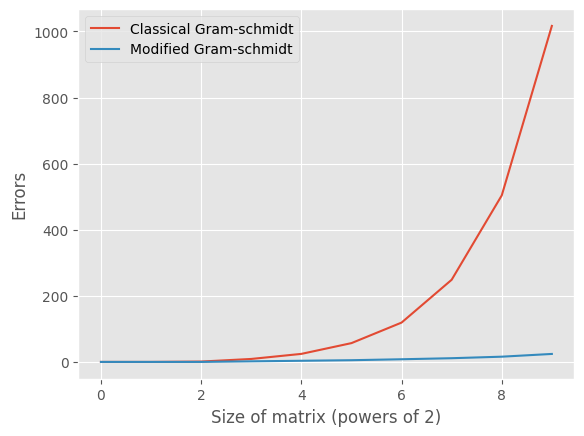

In [98]:
print('classic_errors:', classical_errors, '\n', 'modified_errors: ', modified_errors)
plt.plot(classical_errors, label='Classical Gram-schmidt')
plt.plot(modified_errors, label='Modified Gram-schmidt')
plt.xlabel('Size of matrix (powers of 2)')
plt.ylabel('Errors')
plt.legend()
plt.show()

Using QR decomposition, the coefficients in least square approximation can be found as follows:
$$ \hat{\theta}_{qr} = R^{-1} \; Q^T \; y$$

**Question 6:** calculate $\hat{\theta}_{qr}$ for $X$ and $y$ using QR decomposition and `modified_gram_schmidt` function:

In [99]:
Q, R = modified_gram_schmidt(X) 
theta_hat_qr = inv(R) @ Q.T @ y 
theta_hat_qr

array([[0.84210526],
       [1.89473684]])

Note that we get the same result by using QR decompositon.

## Givens Rotations


QR decompositions can also be computed with a series of Givens rotations. Each rotation zeroes an element in the subdiagonal of the matrix, forming the R matrix. The concatenation of all the Givens rotations forms the orthogonal Q matrix.
A Givens rotation is represented by a matrix of the form

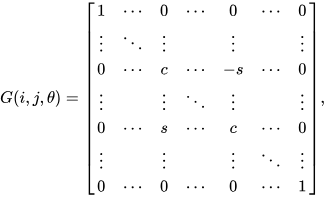


where c = cos θ and s = sin θ appear at the intersections ith and jth rows and columns. That is, for fixed i > j, the non-zero elements of Givens matrix are given by:


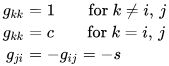


In practice, Givens rotations are not actually performed by building a whole matrix and doing a matrix multiplication. A Givens rotation procedure is used instead which does the equivalent of the sparse Givens matrix multiplication, without the extra work of handling the sparse elements.



For example, Let us calculate the decomposition of 


$ A  = \begin{pmatrix}12&-51&14\\6&167&-68\\-4&24&-41\end{pmatrix} $

First, we need to form a rotation matrix that will zero the lowermost left element, $ a_{31}=-4$. We form this matrix using the Givens rotation method, and call the matrix $ G_{1} $. We will first rotate the vector [12  -4], to point along the $ X$ axis. This vector has an angle $ \theta  = arctan(\frac{-(-4)}{12})$. We create the orthogonal Givens rotation matrix, $G_{1}$:

$ A  = \begin{pmatrix}cos(\theta)&0&-sin(\theta)\\0&1&0\\sin(\theta)&0&cos(\theta)\end{pmatrix} \qquad   = \qquad \begin{pmatrix}0.94868&0&-0.31622\\0&1&0\\0.31622&0&0.94868\end{pmatrix} $


And the result of $G_{1}A$ now has a zero in the $a_{31}$ element.

$ G_{1}A  = \begin{pmatrix}12.64911&-55.97231&16.76007\\6&167&-68\\0&6.64078&-37.6311\end{pmatrix} $



We can similarly form Givens matrices $G_{2}$ and $G_{3}$, which will zero the sub-diagonal elements $a_{21}$ and $a_{32}$, forming a triangular matrix $R$. The orthogonal matrix  $Q^{\textsf {T}}$ is formed from the product of all the Givens matrices $Q^{\textsf {T}} = G_{1}G_{2}G_{3}$. Thus, we have $G_{1}G_{2}G_{3}A = Q^{\textsf {T}}A = R$, and the QR decomposition is $A = QR$

Now explain about the Advantages and disadvantages of Givens rotations.

## Implementing Givens Rotations Method


**Question 7:** implement the function `G_matrix` which takes the the  matrix A and indexes i, j and returns the $G$ corresponding rotation matrix.

In [100]:
def G_matrix(A, a, b):
    # Calculate the r, c, s values
    r = np.sqrt(A[a, a]**2 + A[b, a]**2)
    c = A[a, a] / r
    s = -A[b, a] / r

    # Build the G matrix
    G = np.eye(A.shape[0])
    G[a, a] = c
    G[b, b] = c
    G[a, b] = s
    G[b, a] = -s

    return G

**Question 8:** implement the function `givens_rotation` which takes the matrix A and returns the Q matrix.

In [101]:
def givens_qr(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A
    for j in range(n):
        min_val = np.abs(A[j, j])
        min_ind = j
        for i in range(j + 1, m):
            if np.abs(A[i, j]) < min_val:
                min_val = np.abs(A[i, j])
                min_ind = i
        G = G_matrix(A[j, j], a=j, b=min_ind)
        Q[:, j] = Q[:, j] @ G.T
        R[j, j] = R[j, j] @ G
    return Q

Test the implementation by dummy data

In [102]:
# X = np.array([[6, 5, 0], [5, 1, 4], [0, 4, 3]])
# Q = ...
# R = ...
# print(Q, R)
X = np.array([[6, 5, 0], [5, 1, 4], [0, 4, 3]])
Q = np.eye(X.shape[0])
R = X.copy()

for j in range(X.shape[1]):
    for i in range(j + 1, X.shape[0]):
        G = G_matrix(R, i, j)
        R = G @ R
        Q = Q @ G.T

print(Q, R)

[[ 0.11914522  0.75753711  0.64182703]
 [ 0.5957261  -0.57168801  0.56416596]
 [ 0.79430147  0.31513544 -0.51939853]] [[ 3.69350184  4.36865809  4.76580882]
 [ 1.68678264  4.47653931 -1.34134571]
 [ 6.671792    1.69570702  0.69846827]]


# Predicting Mobile prices <a class="anchor" id="sec5"></a>
Now we want to build a model to perdict moblie prices using Least square approximation. we use Cellphone DataSet. this dataset is pulled from [Cellphone Dataset](https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction).

This dataset consist of `Sale`, `weight`, `resoloution`, `ppi`, `cpu core` , `cpu core`,`cpu freq`, `internal mem`, `ram`, `RearCam`  , `Front_Cam`, `battery`, `thickness` as **independent variables** and `Price` as **dependent variable**.


In the previous example (that we tried to fit a line through some points), there was only one independent variable. the hypothesis function we used was as follows:
$$ h(x_i) = \hat{\theta_0} + \hat{\theta_1} x_i : \;\;\;\;
\begin{bmatrix} 1&x_1\\1&x_2\\.&.\\.&.\\1&x_m\end{bmatrix} 
\begin{bmatrix}\hat{\theta_0}\\\hat{\theta_1}\end{bmatrix} 
= \begin{bmatrix} h(x_1)\\h(x_2)\\.\\.\\h(x_m)\end{bmatrix} 
\;\;\;\;\;\; \text{($x_i$ is indepedent variable and $y_i$ is dependent variable)} $$

($h(x_i)$ is the predicted value of $y_i$)

In this dataset we have multiple independent variables, so we use __Multiple linear regression__.


In [103]:
df = pd.read_csv('Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [104]:
df.shape

(161, 14)

Looking at the shape of dataset, there are $m = 187$ samples and $n = 7$ variables. Target variable is `price`. using multiple linear regression, hypothesis function looks like this:
$$
h(x_i) = Sale \times \theta_1 + weight\ \times \theta_2 + resolution \times \theta_3 + ppi \times \theta_4 + cpu core \times \theta_5 + cpu freq \times \theta_6 + Front_Cam \times \theta_7 + battery \times \theta_8 + thickness \times \theta_9 \\
\text{(for the $i^{th}$ sample)}
$$


the $i^{th}$ training example can be represented as:
$$
x_i =  \begin{bmatrix} x_{i_1}&x_{i_2}&...&x_{i_6} \end{bmatrix}=  \begin{bmatrix} Sale_{1}&weight_{2}&...&thickness_{6} \end{bmatrix}
$$

now we combine all training examples into a single input matrix of size $m \times n$:
$$
\mathbf{X}= \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}
$$
we represent coefficients of function and dependent variable in vector form as:
$$
\theta = \left (\begin{matrix} \theta_1 \\ \theta_2 \\ .\\.\\ \theta_6 \end {matrix}\right)\; , \;\;
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)
$$
So we represent hypothesis function in vectorize form: 
$$\mathbf{ h_\theta{(x)} = X\theta}$$

## Model building

First we have to build the following matrices:
$$h_{(x)} =X\theta \;\; \rightarrow \;\;\;
\begin{bmatrix}
x_{11}&x_{12}&...&x_{16}\\
x_{21}&x_{22}&...&x_{26}\\
.&.&...&.\\
x_{m1}&x_{m2}&...&x_{m6}\\
\end{bmatrix} \;\;
\begin{bmatrix}\theta_1\\\theta_2\\\theta_3\\\theta_4\\\theta_5\\\theta_6\end{bmatrix}
= \begin{bmatrix} h(x_1)\\h(x_2)\\.\\h(x_m)\end{bmatrix} \;\;,\;\; 
\mathbf{ y } = \begin{bmatrix} y_1\\y_2\\.\\y_m\end{bmatrix}
$$

## Exercise 3 <a class="anchor" id="sec6"></a>

**Question 1**: build matrices $X$ and $y$ which were described above:

In [105]:
X = df.drop(['Price'], axis=1).to_numpy()   
y = df['Price'].to_numpy() 
X, y

(array([[2.030e+02, 1.000e+01, 1.350e+02, ..., 8.000e+00, 2.610e+03,
         7.400e+00],
        [8.800e+02, 1.000e+01, 1.250e+02, ..., 0.000e+00, 1.700e+03,
         9.900e+00],
        [4.000e+01, 1.000e+01, 1.100e+02, ..., 5.000e+00, 2.000e+03,
         7.600e+00],
        ...,
        [8.560e+02, 8.809e+03, 1.500e+02, ..., 2.000e+01, 3.000e+03,
         6.800e+00],
        [1.296e+03, 8.946e+03, 1.700e+02, ..., 8.000e+00, 3.400e+03,
         7.900e+00],
        [1.131e+03, 9.807e+03, 2.020e+02, ..., 1.600e+01, 2.700e+03,
         8.400e+00]]),
 array([2357, 1749, 1916, 1315, 1749, 2137, 1238, 2137, 1315, 2580, 2438,
        2006, 2174, 2744, 2580, 1612, 2258, 2938, 1612, 1238, 2438, 2392,
        2977, 2744, 1942, 1390, 2006, 2938, 1390, 1950, 2258, 2977, 3316,
        2654, 1421, 2654, 1942, 2124, 1777, 2392, 2124, 2087, 1843, 2087,
        2859, 1989, 1421, 3316, 1843, 2685, 1741, 1347, 2859, 3658, 1984,
        1777, 3658, 1984, 1989, 1741, 2824, 2746, 1347, 2323, 2685, 2824,
 

## Spliting Data:
in order to evaluate our model, we should split the data into training examples and test examples and use training examples to build the hypothesis function and use test examples to evaluate the model.

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
X_train.shape, X_test.shape

((120, 13), (41, 13))

## Training the Model
we want to build the hypothesis function by finding vector of coefficients ($\theta$), then use it to predict prices. 

as we mentioned before, by using QR decompostion the coefficients can be found as follows:
$$
X = Q . R \\
\theta = R^{-1} . Q^T . y
$$

**Question 2**: calculate $Q$ and $R$ for training examples using the `modified_gram_schmidt` function, then calculate $\theta$ (coefficients of hypothesis function):

In [107]:
Q, R = modified_gram_schmidt(X_train)
theta = np.linalg.inv(R) @ Q.T @ y_train 
print(theta)

[ 1.15780254e-01 -9.73656834e-03 -4.57743396e+00  2.31141730e+02
  1.53197075e+00  7.01357967e+01 -8.33647735e+00  6.15723708e+00
  9.51707202e+01 -1.66127783e+00  1.15391327e+00  1.49739002e-01
  1.11184997e+01]


## Prediction from our model
now that we have $\theta$, using hypothesis function we can predict prices:
$$
h(x) = X . \theta
$$

**Question 3:** calculate predicted prices for both training data and testing data:

In [108]:
y_train_pred = X_train @ theta
y_test_pred  = X_test @ theta

Plotting the predicted prices and actual prices for test data:

Text(0.5, 0, 'Index')

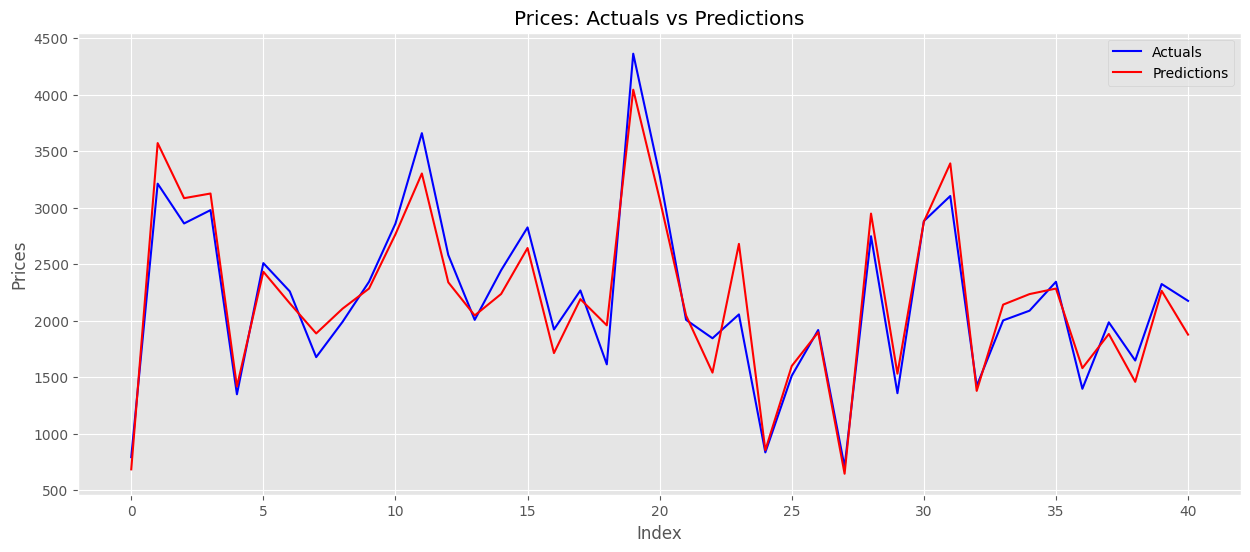

In [109]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=np.arange(len(y_test)) , y=y_test, label='Actuals',color='blue',ax=ax)
sns.lineplot(x=np.arange(len(y_test)), y=y_test_pred, label='Predictions',color='red',ax=ax)
ax.set_title('Prices: Actuals vs Predictions')
ax.set_ylabel('Prices')
ax.set_xlabel('Index')

## Model Evaluation<a class="anchor" id="sec5_5"></a>

We predicted value for charges by using our model coefficients for test data set. Now we will compare the predicted value with actual value in test set. 

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicates that model explains none of the variability of the response data around it's mean. 100% indicates that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(h(x_i) - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(h(x_i) - \bar{y}_i)^2} \;\;\; \text{($\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$)}$$

## Exercise 4: <a class="anchor" id="sec7"></a>
**Question 1:** calculate $R^2$ score of testing data using $\mathbf{R^2 = 1 - \frac{SSE}{SST}}$: 

In [110]:
sse_test_data = np.sum((y_test_pred - y_test)**2) 
sst_test_data = np.sum((y_test - y_test.mean())**2) 
R_square_test_data = 1 - (sse_test_data/sst_test_data) 

print(R_square_test_data)

0.9254935678845402


A $R^2$ score above 0.75 for our model is good enough for purpose of this homework and it fits our data test very well.

## Overfitting
A concern with multiple regression is overfitting; with a lot of predictors and a
limited number of samples, random sampling fluctuations will allow some linear
combination of the predictors to match the predictand perfectly over the limited
samples we have, but the correlations will fall apart for a different set of samples.

**Question 2:** we can calculate $R^2$ score of training data set and compare it to $R^2$ score of testing data set and check if overfitting happens:

In [111]:
sse_train_data = np.sum((y_train_pred - y_train)**2) 
sst_train_data = np.sum((y_train - y_train.mean())**2)
R_square_train_data = 1 - (sse_train_data/sst_train_data) 

print(R_square_train_data)
print(R_square_test_data)

0.9350411211307817
0.9254935678845402


(Difference between $R^2$ score of training and testing data should not be drastic and overfitting should not happen)

# Polynomial Regression: <a class="anchor" id="sec8"></a>
For the linear models, the main idea is to fit a straight line to our data. However, if the data has a quadratic distribution, this time choosing a quadratic function and applying a polynomial transformation may give us better results. This time the hypothesis function is defined as:

$$
h_{\theta} (X) = \theta_0 + \theta_1 \times x + \theta_2 \times x^2 +\;...\;+ \theta_n \times x^n
$$

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like:
$$
y = \theta_0 + \theta_1 \times x
$$

If we want to fit a parabola to the data instead of a line, we can combine the features in second-order polynomials, so that the model looks like this:
$$
y = \theta_0 + \theta_1 \times x + \theta_2 \times x^2
$$

Note that this is still a linear model: to see this, imagine creating a new set of variables:
$$
z = [x, \; x^2]
$$
With this re-labeling of the data, our problem can be written:

$$
y = \theta_0 + \theta_1 \times z_1 + \theta_2 \times z_2
$$

We see that the resulting polynomial regression is in the same class of linear models we’d considered above and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

## Exercise 5 <a class="anchor" id="sec9"></a>
### Second order polynomial
Consider these points in two-dimensional space:
$$ (x_i, y_{i}) = (1, 2),  (2, 4),  (3, 7),  (5, 26), (6, 37), (7, 47), (8, 67)$$

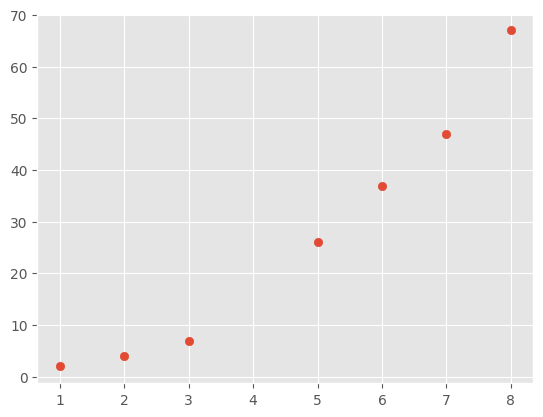

In [112]:
x = np.array([[1], [2], [3], [5], [6], [7], [8]]) 
y = np.array([[2], [4], [7], [26], [37], [47], [67]]) 
plt.scatter(x, y)
plt.show()

using simple regression (fitting straight line) the hypothesis function is:
$$
h(x) = \theta_0 + \theta_1 \times x
$$
as we mentioned above, using second order polynomial regression (fitting parabola) the hypothesis function is:
$$
h(x) = \theta_0 + \theta_1 \times x + \theta_2 \times x^2 
$$
so we need to construct the polynomial feature $x^2$:
$$
X = \begin {bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3\\ 1 & 5 \\ 1 & 6 \\ 1 & 7\\ 1 & 8 \end{bmatrix} \;\;\;\; \theta = \begin {bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} \;\;\;\; y = \begin {bmatrix} 2 \\ 4 \\ 7\\ 26 \\37 \\47 \\67 \end{bmatrix} \;\;\;\; X \theta = y \;\;\;\;\;
\xrightarrow[\text{second order Polynomial}]{\text{Constructing polynomial feature ($x^2$)}}
X_{poly} = \begin {bmatrix} 1 & 1 & 1\\ 1 & 2 & 4\\ 1 & 3 & 9\\ 1 & 5 & 25\\ 1 & 6 & 36\\ 1 & 7 & 49\\ 1 & 8 & 64\end{bmatrix} \;\;\;\; \theta_2 = \begin {bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix} \;\;\;\; y = \begin {bmatrix} 2 \\ 4 \\ 7\\ 26 \\37 \\47 \\67 \end{bmatrix} \;\;\;\; X_{poly} \times \theta_2 = y \;\;\;\;\;
$$


First lets see result of fitting a line through these points:

**Qusetion 1**: using least square approximation, which we explained previously, fit a straight line through these points (simple regression):

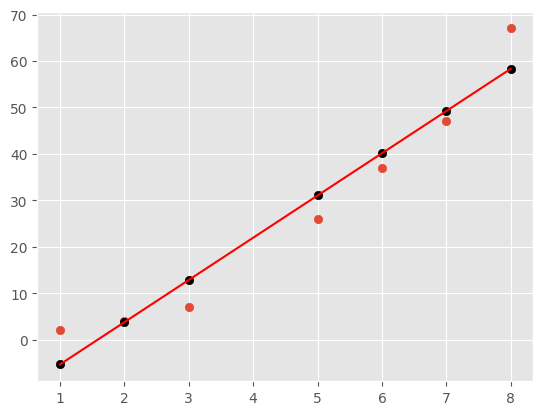

In [113]:
x = np.array([[1, 1], [1, 2], [1, 3], [1, 5], [1, 6], [1, 7], [1, 8]]) 
y = np.array([[2], [4], [7], [26], [37], [47], [67]]) 

theta = np.linalg.inv(x.T @ (x)) @ x.T @ y  
# h is the predicted values for x 
h = x @ theta 

plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], h, color = 'black')
plt.plot(x[:, 1], h, color = 'red')
plt.show()

Now lets see the result of fitting a parabola.

**Question 2**: using least square approximation, fit a parabola:

(first step is constructing the polynomial features, here the only polynomial feature is $x^2$ and append it to $X_{poly}$)

In [114]:
# construct the polynomial feature x_2
x_2 = (x[:,1]**2).reshape((len(x[:,1]), 1)) 

# Append the polynomial feature to X_poly
x_poly = np.append(x, x_2, axis=1) 
x_poly

array([[ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  5, 25],
       [ 1,  6, 36],
       [ 1,  7, 49],
       [ 1,  8, 64]])

Note that after appending the polynomial feature to $X_{poly}$, we treat the polynomial features($x^2$) like the rest of features($x^0 \text{ and } x$).

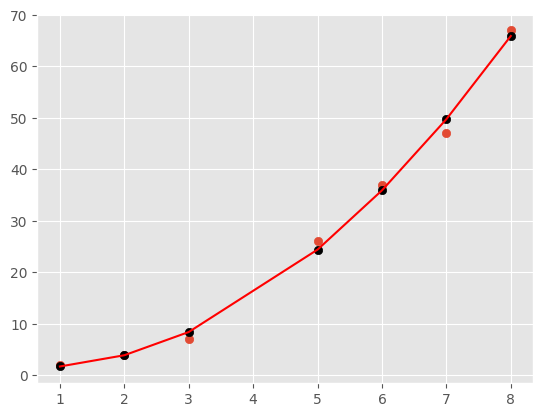

In [115]:
theta2 = np.linalg.inv(x_poly.T @ (x_poly)) @ x_poly.T @ y 
# h is the predicted values for x (h = X_poly * theta2)
h = x_poly @ theta2 

plt.scatter(x_poly[:,1], y)
plt.scatter(x_poly[:, 1], h, color = 'black')
plt.plot(x_poly[:, 1], h, color = 'red')
plt.show()

# Predicting Mobile prices using Polynomial Regression <a class="anchor" id="sec10"></a>
Lets see if we can use polynomial regression in the mobile price dataset. first plot the [correlation](https://en.wikipedia.org/wiki/Correlation) between dependent and independet variables in dataset:

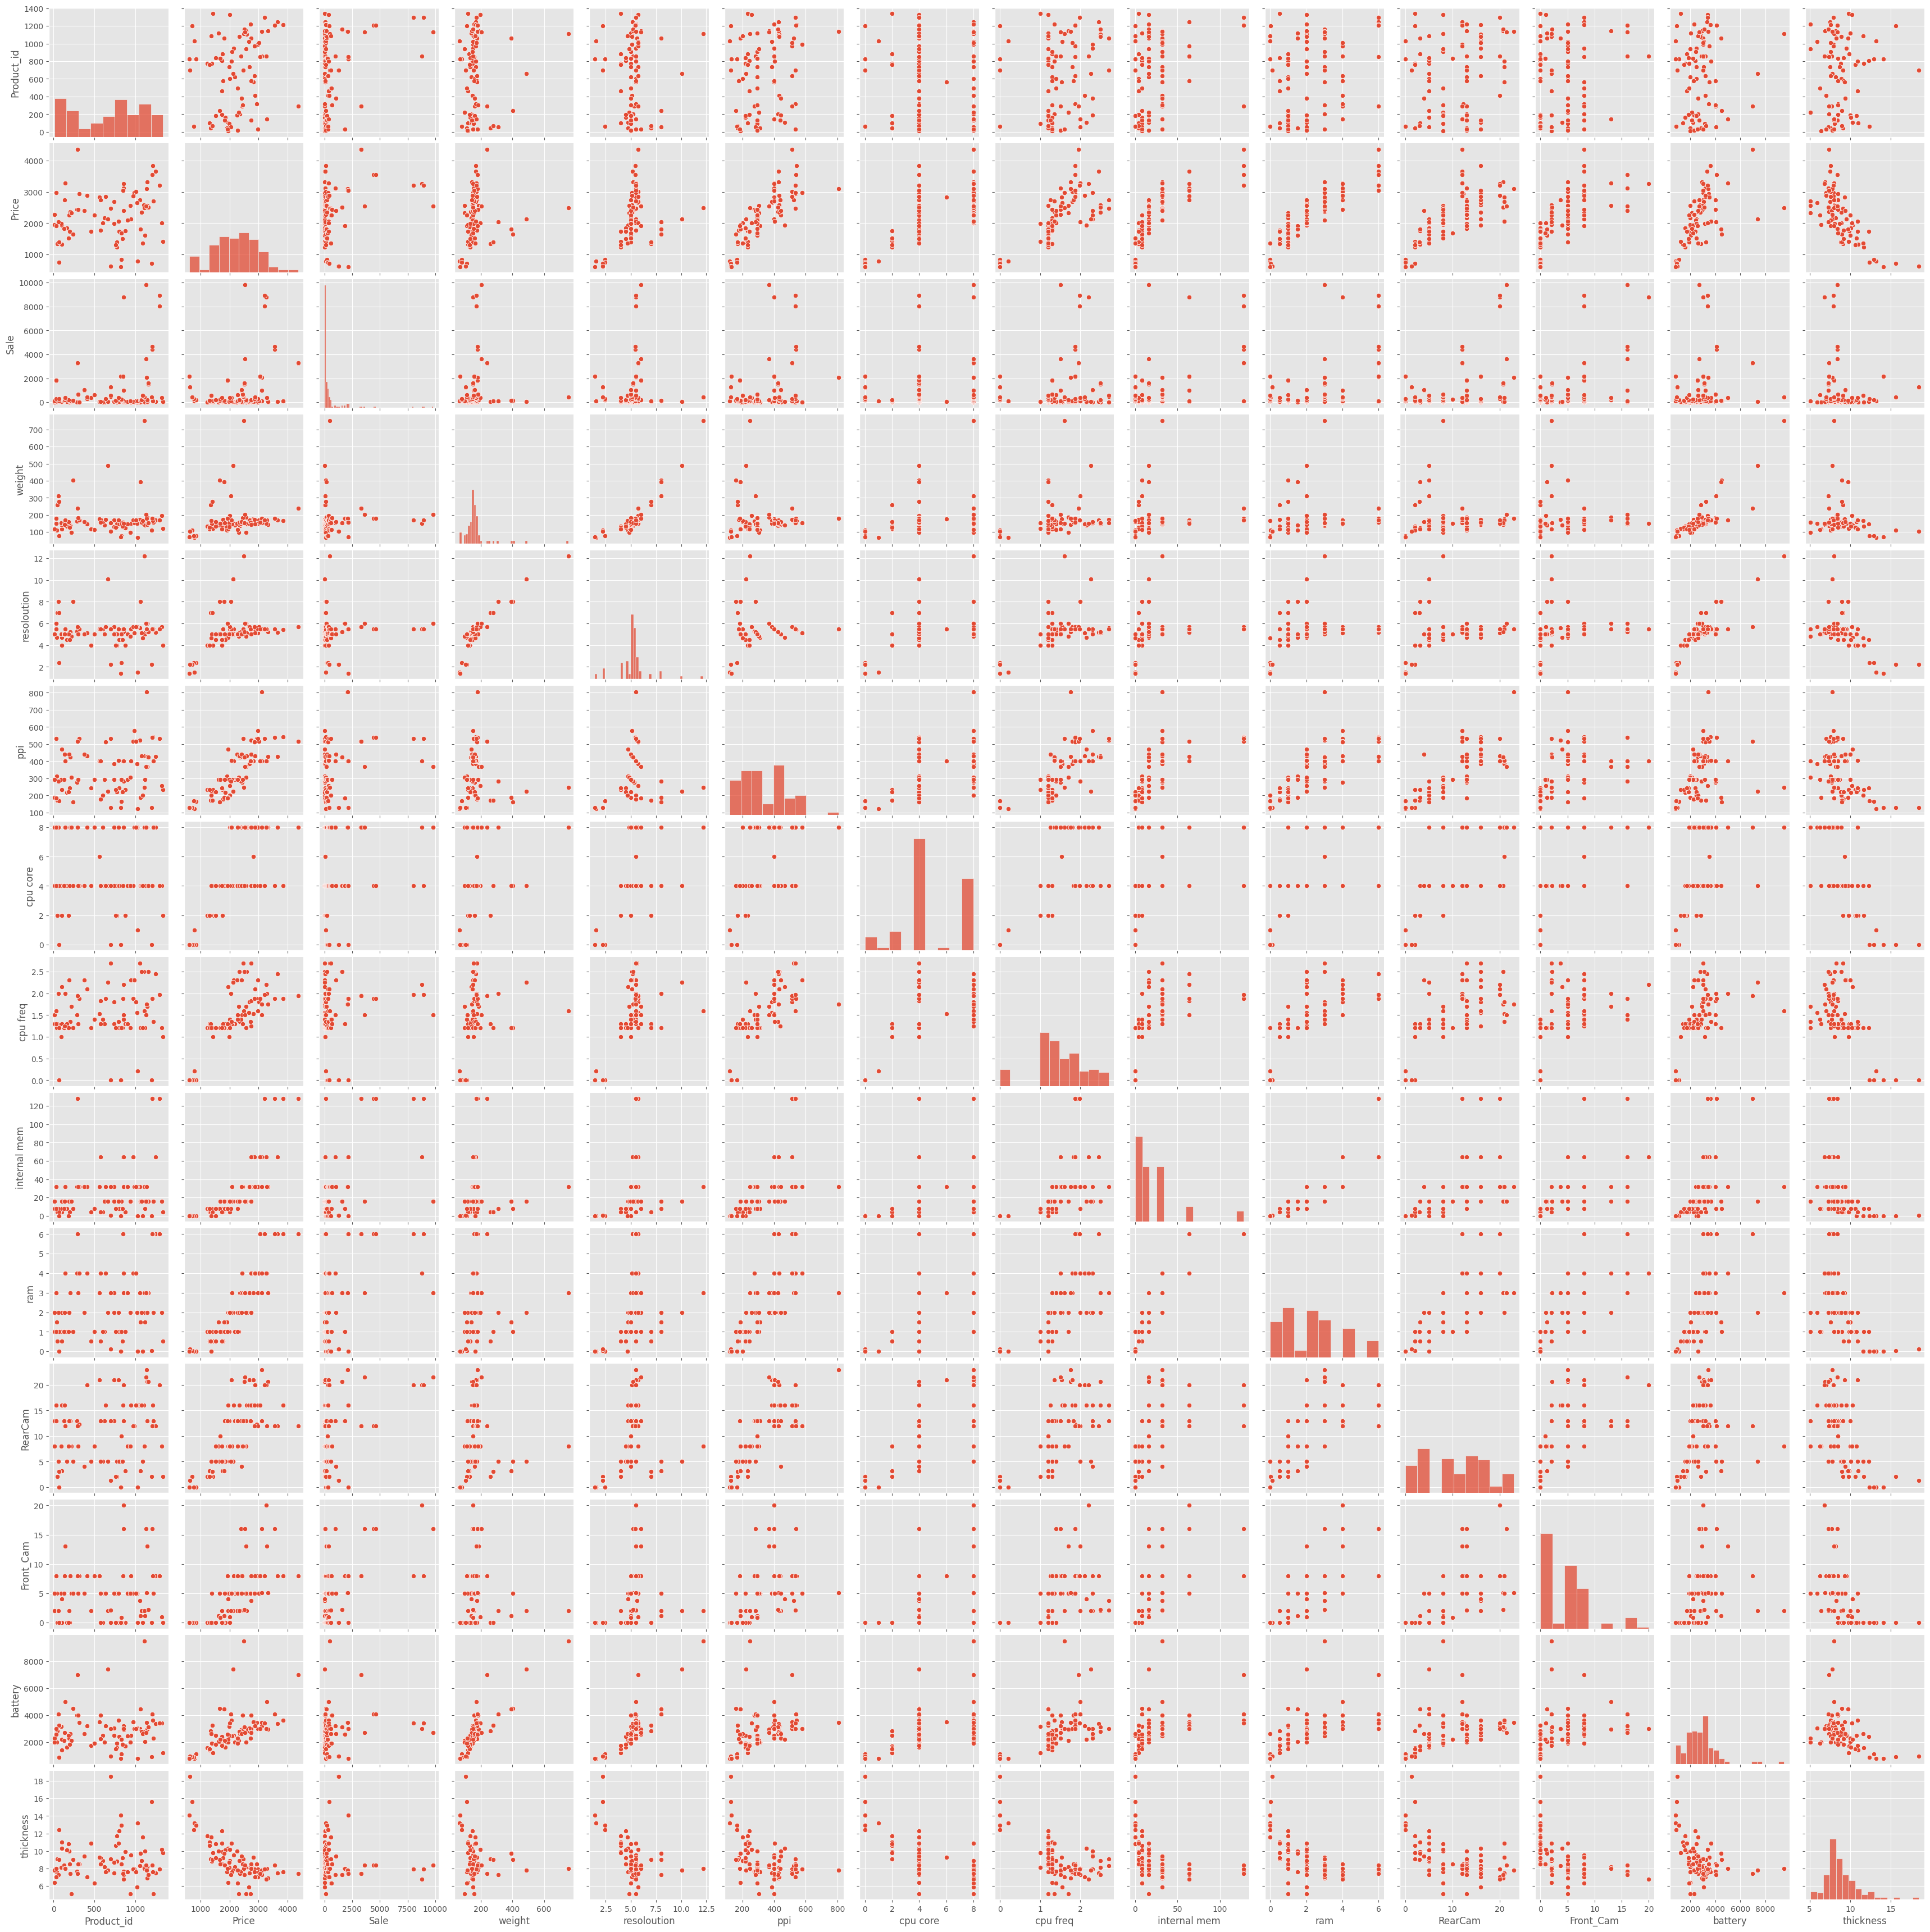

In [66]:
sns.pairplot(df)

We are looking for independent variables that have a polynomial relationship with the dependent variable(`price`).
At first glance, we can see that thickness has a quadratic relationship with price and a parabola can fit in (thickness)-(price) plot. so we add $(thickness)^2$ to the hypothesis function as a polynomial feature:
$$
h(x_i) = Sale \times \theta_1 + weight\ \times \theta_2 + resolution \times \theta_3 + ppi \times \theta_4 + cpu core \times \theta_5 + cpu freq \times \theta_6 + Front_Cam \times \theta_7 + battery \times \theta_8 + thickness^2 \times \theta_9
$$
and the $i^{th}$ training example can be represented as:
$$
x_i =  \begin{bmatrix} x_{i_1}&x_{i_2}&...&x_{i_8}& x_{i_9} \end{bmatrix}=  \begin{bmatrix} Sale_{1}&weight_{2}&...&battery_{8} & thickness^2_{9}\end{bmatrix}
$$

## Exercise 6 <a class="anchor" id="sec11"></a>
predict mobile prices using polynomial regression and hypothesis function that was descrbed above (only use $thickness^2$ as a polynomial feature).
- first construct the polynomial featue ($thickness^2$). then append it to the $X_{poly}$ 
- use least square approximation on $X_{poly}$ and the new hypothesis function.
- at the end compare evaluation result of polynomial regression with multiple regresson from last exercise

#### Construct the polynomial feature

In [116]:

thickness_2 = (df['thickness']**2).to_numpy().reshape((len(df['thickness']), 1)) # SOLUTION  


#### Model building

In [117]:
X_poly = np.append(df.drop(['Price'], axis=1).to_numpy(), thickness_2, axis=1)
y_poly = df['Price'].to_numpy() 

#### Spliting data

In [118]:
from sklearn.model_selection import train_test_split
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, test_size=0.25, random_state=11) 
X_poly_train.shape, X_poly_test.shape

((120, 14), (41, 14))

#### Training the model

#### Predcition from our model

In [119]:
Q_poly, R_poly = modified_gram_schmidt(X_poly_train) 
theta_poly = np.linalg.inv(R_poly) @ Q_poly.T @ y_poly_train 
print(theta_poly)

y_poly_train_pred = X_poly_train @ theta_poly 
y_poly_test_pred  = X_poly_test @ theta_poly

[ 1.16161987e-01 -9.91145289e-03 -3.98983827e+00  1.83390820e+02
  1.47894137e+00  7.01861520e+01 -1.37027547e+01  6.11683257e+00
  9.64122488e+01 -4.37253333e-01  1.28457992e+00  1.48484412e-01
  5.59642326e+01 -2.78512235e+00]


### Model evaluation

In [120]:
sse_test_data = np.sum((y_poly_test_pred - y_poly_test)**2) 
sst_test_data = np.sum((y_poly_test - y_poly_test.mean())**2) 
R_square_test_data = 1 - (sse_test_data/sst_test_data) 

sse_train_data = np.sum((y_poly_train_pred - y_poly_train)**2)
sst_train_data = np.sum((y_poly_train - y_poly_train.mean())**2) 
R_square_train_data = 1 - (sse_train_data/sst_train_data) 

print(R_square_train_data)
print(R_square_test_data)

0.9366019621417997
0.9286899846650907


Text(0.5, 0, 'Index')

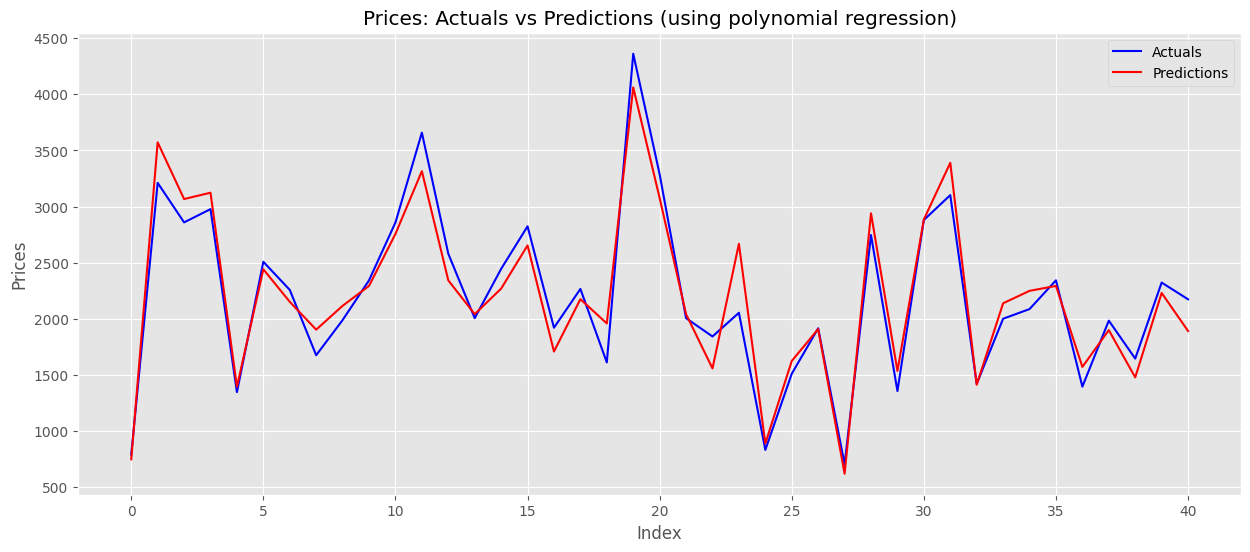

In [121]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=np.arange(len(y_poly_test)) , y=y_poly_test, label='Actuals',color='blue',ax=ax)
sns.lineplot(x=np.arange(len(y_poly_test)), y=y_poly_test_pred, label='Predictions',color='red',ax=ax)
ax.set_title('Prices: Actuals vs Predictions (using polynomial regression)')
ax.set_ylabel('Prices')
ax.set_xlabel('Index')

# Recursive Least Square: <a class="anchor" id="sec8"></a>
The Normal Equations for Least Squares are ubiquitous and for good reason. Apart from very large datasets, the Normal Equations are easy to use, easily generalizable to datasets with multiple variables, and easy to remember.


$$
A^TA\hat{x} = A^T b \\
\hat{x} = (A^TA)^{-1}A^Tb
$$

The need for an alternate formula arises when dealing with a dataset that is continuously increasing in size.

### The Need For Recursive Least Squares
When solving for x, finding the inverse of A transpose A is an expensive computation. With a large matrix A, this could become a large bottleneck and is one of the reasons why Normal Equations are generally reserved for smaller datasets

Say we’re in a situation where we calculate least squares using the Normal Equation, add one more datapoint to our dataset, and want to see what our new line* is. It would be inconvenient and seemingly redundant if we were to use the normal equation again and calculate that nightmarish A transpose A inverse term, just to include our one new single data point.

If we’re tracking the movement of something ‘online’, and want to model its movement continuously, we would have to continually adjust our model to new data. A common example is that of a satellite. If we are tracking the position of it using linear regression, we want to continuously update our linear regression model as new data points (satellite’s x, y, z coordinates) flow in time interval t, and we want to do it quickly.

### The New Normal Equation

Let’s say we add a new row of data to our data matrix A. That means we need to add a new corresponding output to our answers vector b.

We can create a block matrix and add on our new datapoint, $A_1$, to the bottom of all our old data, $A_0$. I am not specifying if $A_1$ is a vector or not since it is possible that we are updating our equation with more than just one new data point (maybe 2, or 10, or anything — it’s still cheaper than redoing everything!).

We then add the corresponding outputs to b, which we call $b_1$. If we are only adding a single row, $b_1$ is a single number, but if we are adding multiple, it will be a vector.

$$ \begin{bmatrix}
A_0\\ A_1
\end{bmatrix}
\begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}
$$

$$ \hat{x} = (A^TA)^{-1}A^Tb $$

$$ \rightarrow \hat{x}= 
(\begin{bmatrix}
A_0^T & A_1^T 
\end{bmatrix}\begin{bmatrix}
A_0\\ A_1
\end{bmatrix})^{-1} 
\begin{bmatrix}
A_0^T&  A_1^T 
\end{bmatrix} 
\begin{bmatrix}
b_0\\b_1 
\end{bmatrix} 
$$



If we continue with our block matrices example, we end up with the matrix equation as follows:

$$
(A_0^TA_0 + A_1^TA)^{-1} (A_0^Tb_0 + A^Tb_1)
$$


We can then divide this problem into a few chunks. More specifically, the left term. Inside this inverse, we see that the first term deals with the initial A and the second deals with the added part. We can split these up into P’s.

$$
\hat{x_1} = (A_0^TA_0 + A_1^TA_1)^{-1} (A_0^Tb_0 + A_1^Tb_1) \\\\\\
P_1 = (A_0^TA_0 + A_1^TA_1)^{-1}\\\\
P_0 = (A_0^TA_0)^{-1}\\\\
P_1^{-1} = (A_0^TA_0 + A_1^TA_1)\\\\
P_1^-1 = (P_0^{-1} + A_1^TA)
$$

The reason for this funny organization is so that we can easily implement the Sherman-Morrison-Woodbury Formula, which can speed up our computation of the P1 inverse term, which we can then just multiply by our right-hand sides.


### The Sherman-Morrison-Woodbury Formula

The Sherman-Morrison-Woodbury formula tells us how the inverse of a matrix changes when we change the matrix itself.

$$
(W+X^TYZ)^{-1} = W^{-1} - W^{-1}X^T(Y^{-1} + ZW^{-1}X^T)^{-1}ZW^{-1}
$$

You might know where we’re going with this. Using this formula, we only need to calculate our inverse W, and base all other calculations by taking perturbations with this formula.

In the context of our problem, we can set W to our original A transpose A matrix (that we can’t avoid calculating) and then perturb it by our new entries and see how it changes the overall inverse. Then, we can multiply this by the right non-inverse term, and get our x for that new updated A.

By substituting the terms in the S-M-W equation as follows, we can perturb the matrix so we solve for the P1 term, by knowing the inverse of P0.

$$ set W = A_0^TA_0 = P_0^{-1},\ X=Z=A_1,\ Y=I $$


$$ (A_0^TA_0 + A_1^TA_1)^{-1} = P_1 = P_0 - P_0A_1^T(I+A_1P_0A_1^T)^{-1}A_1P_0
$$

By this approach the computation will always be cheaper to do than to recalculate a Anew transpose Anew matrix.

From this, we can derive an update equation to update x every time a new batch of (M, n) sized data An is supplied to the algorithm.

### The Recursive Least Squares Algorithm

Recall our substituted Sherman-Morrison-Woodbury formula that we just defined, this time without all the specific dimension notation.
Remember that this is just half of the formula for x1. We still need to multiply by our term mentioned in the full equation mentioned in previous.
$$
P_1 = P_0 - P_0A_1^T(I+A_1P_0A_1^T)^{-1}A_1P_0
$$

So, we can complete our formula by tacking on this final term at the end of this, to solve for the updated x vector.

$$
\hat{x_1} = [P_0 - P_0\alpha _1(1+\alpha _1^TP_0\alpha _1)^{-1}\alpha _1^TP_0]\ (A_0^Tb_0 + y_1b_1)
$$

That’s the complete formula for the new x without explicitly 
calculating that pesky Anew transpose Anew inverse operation. To generalize this to any update An, simply replace the 0’s with k-1 and the 1’s with k. The thing is that we only really need 0 and 1. When we want to add a new batch of data, we would calculate P1, and set it as “P0” and then solve for our “P1” (actually P2) using the same function. We never deal with adding two batches of new data at the same time (e.g adding A2 and A3 to A simultaneously) as we could just combine those into one matrix A2.

To speed this up further we try To express our updated function x1 as some sort of function of x0, we need to factor our matrix further. Let’s do just that.

$$
\hat{x_1} = P_1(A_0^Tb_0 + A_1^Tb_1)
$$

As a result we reach to these simplified equation:
$$
\hat{x_1} = \hat{x_0} + P_1A_1^T(A_1 \hat{x_0} - b_1)\\\\
let\ P_1A_1^T = K\\\\
\hat{x_1} = \hat{x_0} + K(A_1 \hat{x_0} - b_1)
$$

That’s all we need to do to calculate our new updated x1 as an update of x0. We first calculate our P for that layer, then calculate our K, then calculate our update for x. Summarized nicely is the algorithm for calculating an update of x when continuously adding data Ak to the A matrix.

## Excercise 5 
<a class="anchor" id="sec9"></a>
Full implementation of recursive least squares base on docs and comments provided

In [122]:
# import numpy.linalg

# class RecursiveLeastSquares():
#     """Creates a RecursiveLeastSquares object, that will efficiently returned modified x's 
#        as more data is inputted using the .addData() method. Updates to x are calculated using
#        the Sherman-Morrison-Woodburry Formula. 
#        - initA (Ndarray)
#                 the initial A matrix in least squares, before adding any data. The calculations 
#                 will be based off this initial matrix. Is size (examples, variables). Think of 
#                 the A matrix in the Normal Equations. 
#        - initB (Ndarray)
#                the initial "answers" B matrix. Same B in the Normal Equations. Size (examples, 1)
#     """
#     def __init__(self, initA, initb):
#         self.A = initA  
#         self.b = initb 

#         # create the initial P matrix, the (A^T*A)^-1 matrix.
#         # we don't link it to self.A, self.b since these will change, and after
#         # the first P, we will use S-M-W to calculate P instead. 
        
#         # initialP is the P_0 that we described in earlier description
#         initialP = ...
#         self.P = initialP

#         # do least squares automatically the first round 

#         # self.K is the other part of the normal equation that multiplies P, (A^T)*B
#         self.K = None
# a
#         # do least squares automatically for first time
#         self.x = ... 
    
#     def addData(self, newA, newb):
#         """add data to the least squares problems and returns an updated x.
           
#            - newA    (ndarray)
#                      adding more rows to the A matrix. Often a row vector (if adding one 
#                      more data point). Otherwise, size is (newpoints, variables)
             
#            - newb    (ndarray)
#                      adds corresponding 'output' for the newA. A (1, 1) ndarray if adding
#                      only one more data point. Else, size is (newpoints, 1)
#             Returns the updated x. 
#         """ 
        
#         self.A = np.concatenate([self.A, newA])

#         self.b = np.concatenate([self.b, newb])

#         # create P by using Sherman-Morrison-Woodburry as described above

#         # size of I depends on rows of data inputted
#         I = (np.eye(np.shape(newA)[0]))

       
#         P1 = ...
#             ...
#             ...     

#         # create K 
#         self.P = P1
#         self.K = ...

#         self.x = self.x + np.dot(self.K, newb - np.dot(newA, self.x))
#         return self.x
import numpy as np

class RecursiveLeastSquares():
    def __init__(self, initA, initb):
        self.A = initA  
        self.b = initb 
        self.P = np.linalg.inv(np.dot(self.A.T, self.A))
        self.K = np.dot(self.A.T, self.b)
        self.x = np.dot(self.P, self.K)

    def addData(self, newA, newb):
        self.A = np.concatenate([self.A, newA])
        self.b = np.concatenate([self.b, newb])
        I = np.eye(newA.shape[0])
        P1 = np.dot(np.dot((I - np.dot(self.P, newA.T)), self.P), (I - np.dot(newA, self.P)))
        K1 = np.dot(newA.T, newb)
        self.P = P1
        self.K = np.concatenate([self.K, K1])
        self.x = np.dot(self.P, self.K)  # Update x using the calculated P and K
        return self.x

Test the implementation by dummy data

In [123]:
A = np.array([[1, 0], [1, 1], [1, 2]])
b = np.array([3, 4, 7])

rls = RecursiveLeastSquares(A, b) 

x0 = rls.x
print(x0)
newA = np.array([[1, 3]])
newb = np.array([11])

rls.addData(newA, newb)
x1 = rls.x
print(x1)

[2.66666667 2.        ]


ValueError: shapes (2,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

# Predicting price using least squares <a class="anchor" id="sec10"></a>
The dataset featured below was created and use to findout price of a house base on its features. The data is collected every periodic time, so the model should update itself by the new data given every time.

First we have part of data and then another batch of data is inputted


## Exercise 6 <a class="anchor" id="sec11"></a>

In [124]:
df1 = pd.read_csv('House_1.csv')
df1

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,1.5,0,1955
1,2384000.0,5.0,2.50,3650,2.0,280,1921
2,342000.0,3.0,2.00,1930,1.0,0,1966
3,420000.0,3.0,2.25,2000,1.0,1000,1963
4,550000.0,4.0,2.50,1940,1.0,800,1976
...,...,...,...,...,...,...,...
2195,440000.0,3.0,1.50,1290,3.0,0,2000
2196,435000.0,5.0,2.25,1970,1.0,520,1986
2197,345000.0,3.0,1.75,1540,1.0,620,1955
2198,558000.0,4.0,2.00,2180,1.0,1160,1900


### Model building
Define X and Y.

X are features values and Y is the target that we want to predict

In [125]:
X = ...
y = ...

Calculating $ \hat{\theta} $

In [126]:
rls = RecursiveLeastSquares(X, y) 
theta_hat = rls.x
print(theta_hat)

AttributeError: 'ellipsis' object has no attribute 'T'

After a period, new data has became available, now by the implementation of the "add_data" function, there is no need to start everything from the begining. we just load the data and add them to our model and calculate new $ \hat{\theta} $

In [127]:
df2 = pd.read_csv('House.csv')
df2

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,yr_built
0,6.200000e+05,2.0,1.00,1430,1.5,130,1929
1,1.228000e+06,4.0,2.50,5730,2.0,1450,1991
2,3.330000e+05,4.0,2.50,1910,1.0,0,1963
3,7.430000e+05,3.0,1.75,2110,1.0,0,1961
4,4.480000e+05,2.0,1.50,1630,1.0,740,1940
...,...,...,...,...,...,...,...
2134,3.081667e+05,3.0,1.75,1510,1.0,0,1954
2135,5.343333e+05,3.0,2.50,1460,2.0,0,1983
2136,4.169042e+05,3.0,2.50,3010,2.0,0,2009
2137,2.034000e+05,4.0,2.00,2090,1.0,1020,1974


In [128]:
new_X = ...
new_y = ...

In [129]:
rls.addData(new_X, new_y)
new_theta_hat = rls.x

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

In [130]:
prediction = ...

The ordinary way was to concat two dataframes and make model on the new dataframe.

In [131]:
merged_df = pd.concat([df1, df2])
merged_df

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,yr_built
0,3.130000e+05,3.0,1.50,1340,1.5,0,1955
1,2.384000e+06,5.0,2.50,3650,2.0,280,1921
2,3.420000e+05,3.0,2.00,1930,1.0,0,1966
3,4.200000e+05,3.0,2.25,2000,1.0,1000,1963
4,5.500000e+05,4.0,2.50,1940,1.0,800,1976
...,...,...,...,...,...,...,...
2134,3.081667e+05,3.0,1.75,1510,1.0,0,1954
2135,5.343333e+05,3.0,2.50,1460,2.0,0,1983
2136,4.169042e+05,3.0,2.50,3010,2.0,0,2009
2137,2.034000e+05,4.0,2.00,2090,1.0,1020,1974


Define X and Y by using the merged_df data

In [132]:
X = ...
y = ...

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11) 
X_train.shape, X_test.shape

TypeError: Singleton array array(Ellipsis, dtype=object) cannot be considered a valid collection.

make the prediction using `new_theta_hat` which is the coefficients trained with recursive least square

In [ ]:
y_test_pred = ...

## Model Evaluation

In [134]:
sse_test_data = ...
sst_test_data = ...
R_square_test_data = ...

print(R_square_test_data)

Ellipsis


A $R^2$ score above 0.4 for our model is good enough for purpose of this homework and it fits our data test very well.
In real world the data should preprocess and the model must fit on preprocessed, clean data

Text(0.5, 0, 'Index')

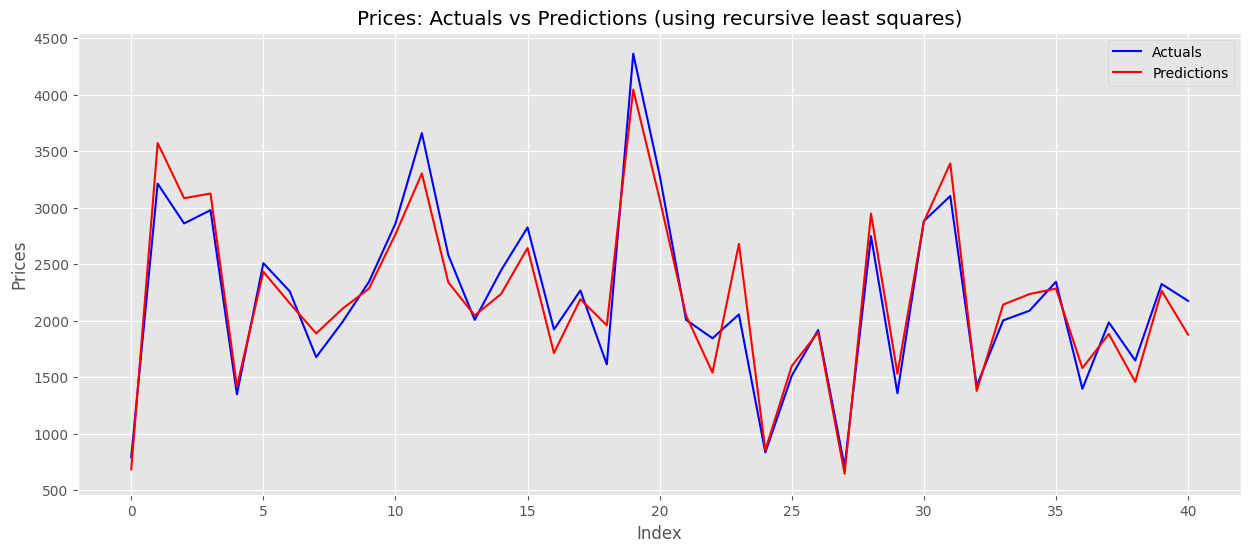

In [135]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=np.arange(len(y_test)) , y=y_test, label='Actuals',color='blue',ax=ax)
sns.lineplot(x=np.arange(len(y_test)), y=y_test_pred, label='Predictions',color='red',ax=ax)
ax.set_title('Prices: Actuals vs Predictions (using recursive least squares)')
ax.set_ylabel('Prices')
ax.set_xlabel('Index')

## Optional Excersice: <a class="anchor" id="sec12"></a>


students are welcomed to use other regression techniques to improve performance and build a model for this data set that predicts **Prices** more accurately.

> This document was compiled, gathered and coded by the teaching assistant team and may be used only for educational purposes. The authors would like to thank the many projects and educational material that made their source code freely available on the internet, especially otter-grader that made the generation and sanitization of the notebook easier.